In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = keras.datasets.fashion_mnist


In [12]:
# load data
(train_img,train_lab),(test_img,test_lab) = data.load_data()

4423680/4422102 [==============================] - 12s 3us/step


In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


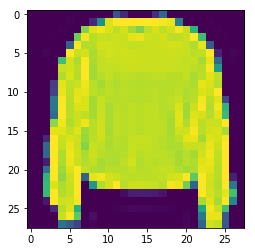

In [16]:
plt.imshow(train_img[7])
plt.show()


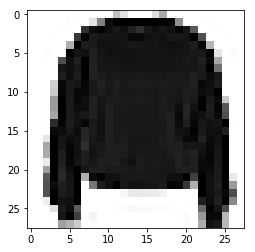

In [17]:
plt.imshow(train_img[7],cmap=plt.cm.binary)
plt.show()


In [18]:
print(train_img[7]) # this is pixcel values[28*28]

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

In [20]:
# shrunk down our data
train_imag = train_img/255.0
test_img = test_img/255.0

In [23]:
#Creating the Model

Our model will have 3 layers, and input layer of 784 neurons (representing all of the 28x28 pixels in a picture) a hidden layer of an arbitrary 128 neurons and an output layer of 10 neurons representing the probability of the picture being each of the 10 classes.

In [24]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [25]:
# Training the Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_img, train_lab, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 170us/sample - loss: 3.2359 - accuracy: 0.6764
Epoch 2/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.6665 - accuracy: 0.7511
Epoch 3/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.5565 - accuracy: 0.8043
Epoch 4/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.5190 - accuracy: 0.8202
Epoch 5/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4996 - accuracy: 0.8268


In [26]:
# test
test_loss, test_acc = model.evaluate(test_img, test_lab)

print('\nTest accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy: 0.1


In [27]:
# pred
predictions = model.predict(test_img)

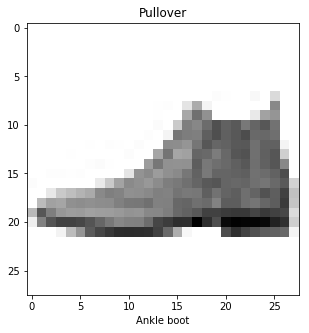

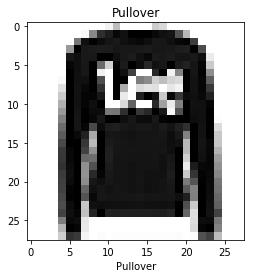

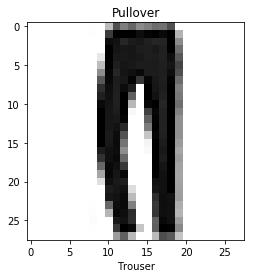

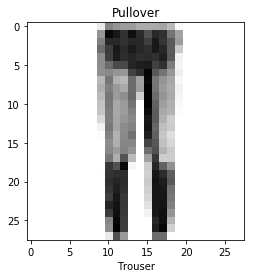

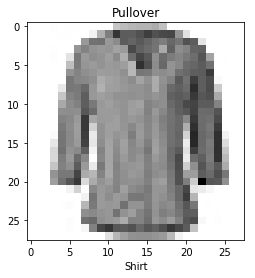

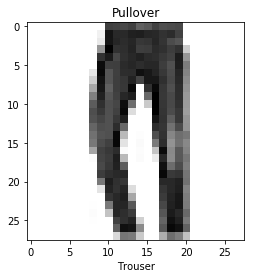

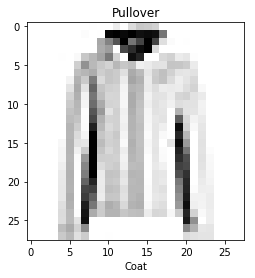

In [30]:
plt.figure(figsize=(5,5))
for i in range(7):
    plt.grid(False)
    plt.imshow(test_img[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_lab[i]])
    plt.title(class_names[np.argmax(predictions[i])])
    plt.show()
